In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ipl = pd.DataFrame()

In [3]:
captains = ['Virender Sehwag', 'MS Dhoni', 'Suresh Raina', 'Ajinkya Rahane', 'Virat Kohli', 'Rohit Sharma']

In [4]:
for i in range(0,12):
    year = i + 2008
    url = 'https://www.iplt20.com/stats/' + str(year) + '/most-runs'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    df = df_list[-1]
    df['PLAYER'] = df['PLAYER'].str.replace(r"  "," ")
    df = df.loc[df['PLAYER'].isin(captains)]
    df = df[['PLAYER', 'Runs']]
    df['Year'] = year
    ipl = pd.concat([ipl, df])

In [5]:
ipl

,PLAYER,Runs,Year
7,Suresh Raina,421,2008
8,MS Dhoni,414,2008
9,Virender Sehwag,406,2008
10,Rohit Sharma,404,2008
37,Virat Kohli,165,2008
...,...,...,...
7,Virat Kohli,464,2019
12,MS Dhoni,416,2019
14,Rohit Sharma,405,2019
18,Ajinkya Rahane,393,2019


In [6]:
missing = pd.DataFrame([['Virender Sehwag', 198, 2009], ['Ajinkya Rahane', 4, 2008]], columns=['PLAYER', 'Runs', 'Year'])

In [7]:
missing

,PLAYER,Runs,Year
0,Virender Sehwag,198,2009
1,Ajinkya Rahane,4,2008


In [8]:
ipl = ipl.append(missing)

In [9]:
ipl.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [10]:
ipl = ipl.sort_values(by='Year')

In [11]:
ipl

,Player,Runs,Year
7,Suresh Raina,421,2008
37,Virat Kohli,165,2008
10,Rohit Sharma,404,2008
1,Ajinkya Rahane,4,2008
8,MS Dhoni,414,2008
...,...,...,...
7,Virat Kohli,464,2019
12,MS Dhoni,416,2019
14,Rohit Sharma,405,2019
18,Ajinkya Rahane,393,2019


In [12]:
colours = ['royalblue', 'gold', 'orangered', 'deeppink', 'red', 'blue']

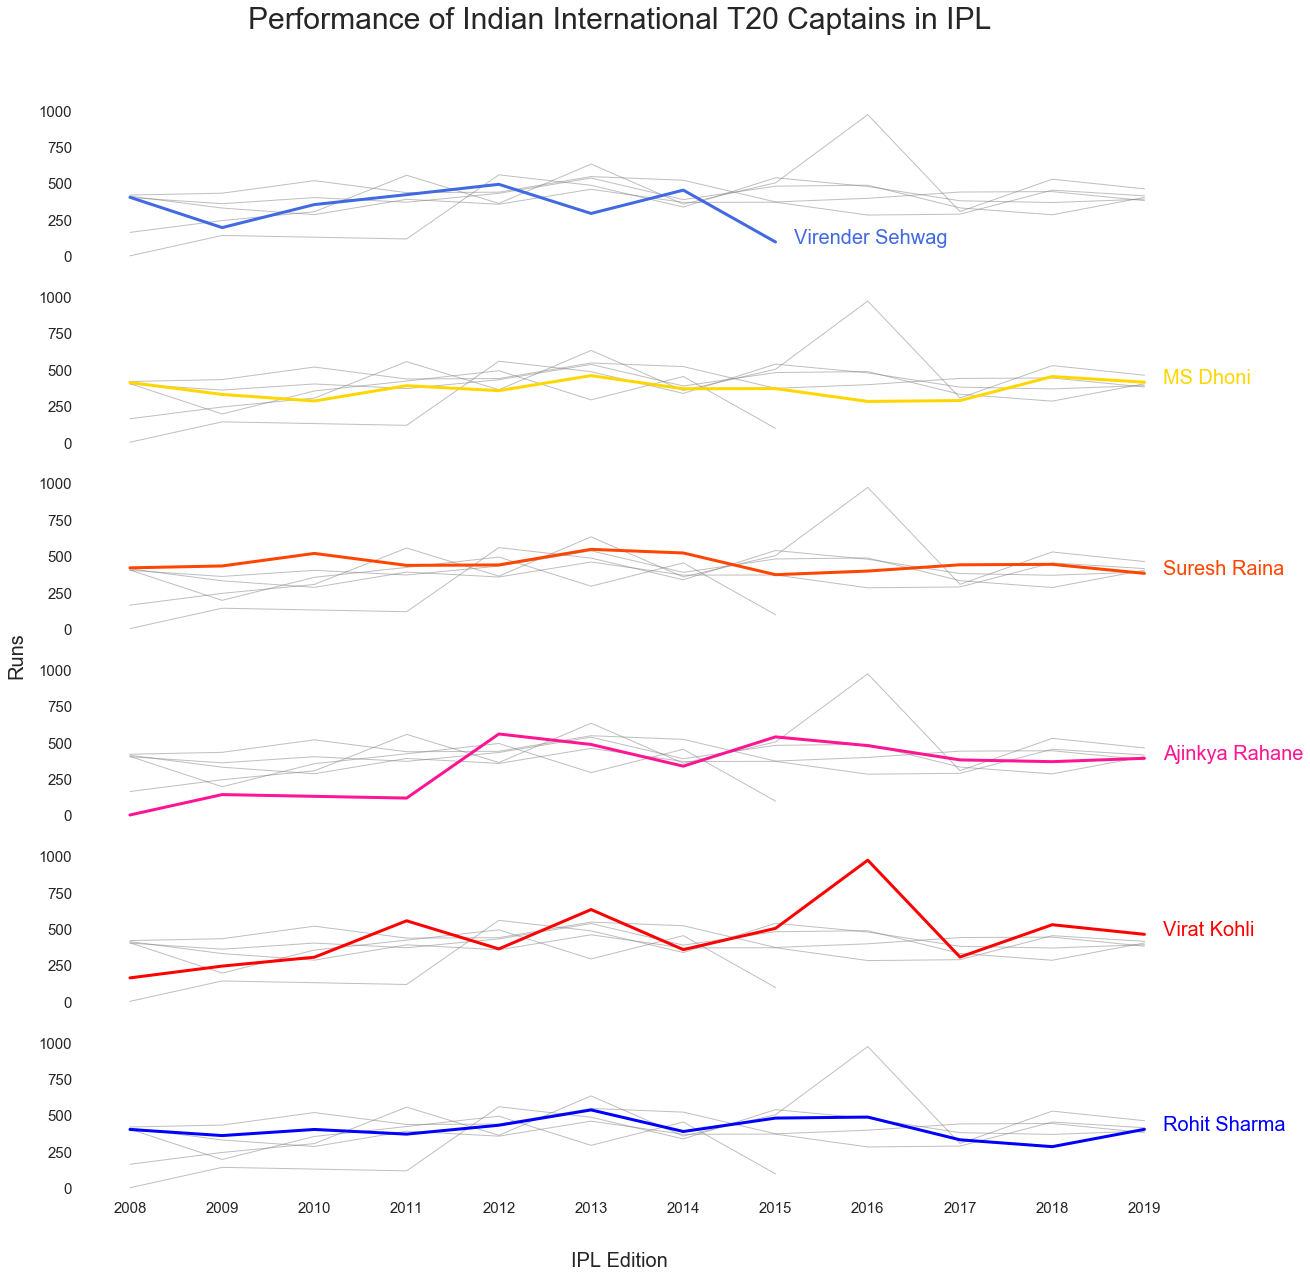

In [56]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(20, 20), sharex = True, sharey=True)
sns.set_style('white')
for num in range(1,7):
    exec('axis = ax'+str(num))
    for x in captains:
        df = ipl[ipl['Player'] == x]
        sns.lineplot(df['Year'], df['Runs'], color='grey', alpha=0.5, linewidth = 1, ax=axis)
    name = captains[num-1]
    df = ipl[ipl['Player'] == name]
    sns.lineplot(df['Year'], df['Runs'], color=colours[num-1], linewidth = 3, ax=axis)
    axis.text(df['Year'].tail(1) + 0.2, df['Runs'].tail(1) - 10, name, horizontalalignment='left', size=20 , color=colours[num-1])
    axis.set_frame_on(False)
    axis.set_ylabel('')    
    axis.set_xlabel('')
    axis.set(xticks=df['Year'].values)
    axis.tick_params(axis='both', which='major', labelsize=15)
sns.despine()
f.text(0.5, 0.075, 'IPL Edition', ha='center', fontsize=20)
f.text(0.075, 0.5, 'Runs', va='center', rotation='vertical', fontsize=20)
t = f.suptitle('Performance of Indian International T20 Captains in IPL', x=0.5, y=0.95, fontsize=30)
f.savefig('Assignment4.png')